In [1]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


fontsize = 30
legend_fontsize = 30
plt.style.use('seaborn-muted')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)


scores = {
    'CIFAR-10': {
        'Inception Score': {
            'CNN': {
                r'$GN$': [
                    6.375269889831543,
                    7.5471720695495605,
                    7.733053684234619,
                    7.181791305541992,
                ],
                r'$GN_0$': [
                    1.000006079673767,
                    1.0001132488250732,
                    1.0000290870666504,
                    1.000011920928955
                ],
                r'$GN_1$': [
                    1.550,
                    1.005,
                    1.000,
                    1.000,
                ],
            },
            'RES': {
                r'$GN$': [
                    8.175854682922363,
                    7.9011125564575195,
                    7.952256202697754,
                    8.110097885131836,
                ],
                r'$GN_0$': [
                    8.055439949035645,
                    4.51271915435791,
                    1.000014066696167,
                    5.921232223510742,
                ],
                r'$GN_1$': [
                    1,
                    1,
                    1,
                    1,
                ],
            },
        },
        'FID': {
            'CNN': {
                r'$GN$': [
                    34.29387283325195,
                    26.018339157104492,
                    22.921632766723633,
                    30.198827743530273,
                ],
                r'$GN_0$': [
                    418.2396545410156,
                    450.21209716796875,
                    379.78302001953125,
                    418.15521240234375,
                ],
                r'$GN_1$': [
                    305.181,
                    398.897,
                    441.272,
                    432.003
                ],
            },
            'RES': {
                r'$GN$': [
                    17.018795013427734,
                    16.708980560302734,
                    16.162677764892578,
                    16.024566650390625,
                ],
                r'$GN_0$': [
                    15.4299898147583,
                    136.38717651367188,
                    370.34088134765625,
                    88.19007110595703,
                ],
                r'$GN_1$': [
                    400,
                    400,
                    400,
                    400
                ],
            },
        }
    },
    'STL-10': {
        'Inception Score': {
            'CNN': {
                r'$GN$': [
                    8.010640144348145,
                    7.859043121337891,
                    5.095637321472168,
                    7.841980934143066,
                ],
                r'$GN_0$': [
                    8.129469871520996,
                    8.151616096496582,
                    5.095637321472168,
                    1.0000211000442505,
                ],
                r'$GN_1$': [1.0, 1.0, 1.0, 1.0],
            },
            'RES': {
                r'$GN$': [
                    9.12,
                    9.02,
                    9.45,
                    9.36,
                ],
                r'$GN_0$': [1.0, 1.0, 1.0, 1.0],
                r'$GN_1$': [1.0, 1.0, 1.0, 1.0],
            },
        },
        'FID': {
            'CNN': {
                r'$GN$': [
                    44.93122482299805,
                    45.341697692871094,
                    97.57919311523438,
                    47.97327423095703,
                ],
                r'$GN_0$': [
                    44.911346435546875,
                    44.917808532714844,
                    97.57919311523438,
                    355.7552490234375,
                ],
                r'$GN_1$': [400, 400, 400, 400],
            },
            'RES': {
                r'$GN$': [
                    26.66,
                    27.05,
                    26.16,
                    27.64
                ],
                r'$GN_0$': [400, 400, 400, 400],
                r'$GN_1$': [400, 400, 400, 400],
            },
        }
    }
}

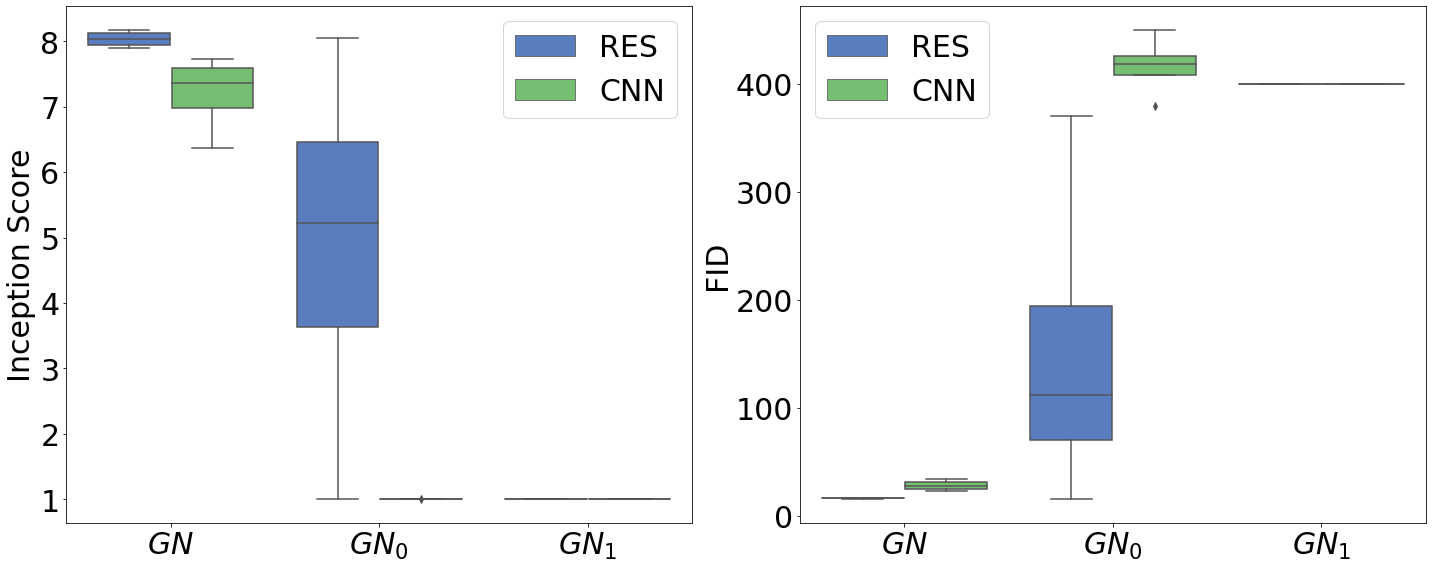

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

os.makedirs('./figures', exist_ok=True)
for i, dataset in enumerate(['CIFAR-10']):
    for j, score in enumerate(['Inception Score', 'FID']):
        hue = []
        x = []
        y = []
        for k, model in enumerate(['RES', 'CNN']):
            for name, values in scores[dataset][score][model].items():
                for v in values:
                    hue.append(model)
                    x.append(name)
                    y.append(v)
        cnt = i * 2 + j
        ax = axs.flat[cnt]
        sns.boxplot(x=x, y=y, hue=hue, ax=ax)
        ax.legend(fontsize=fontsize)
        ax.set_ylabel(score, fontsize=legend_fontsize)
fig.tight_layout()
fig.savefig('./figures/vis_ablation_formulation_cifar10.png')

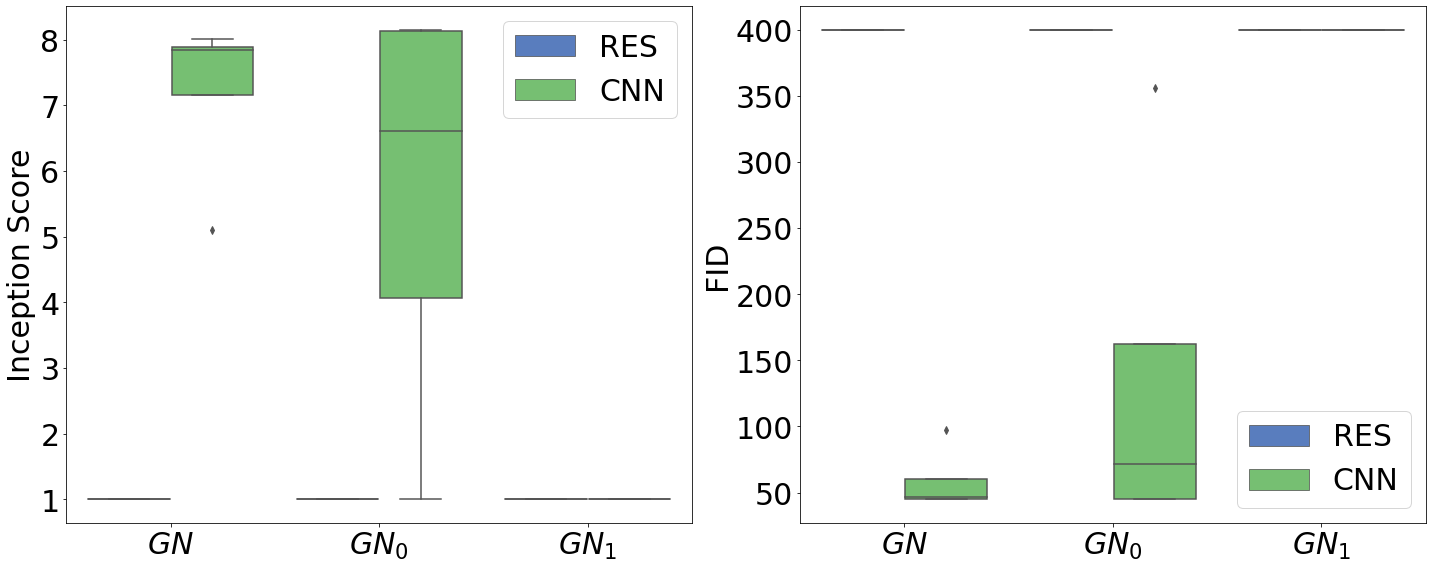

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

os.makedirs('./figures', exist_ok=True)
for i, dataset in enumerate(['STL-10']):
    for j, score in enumerate(['Inception Score', 'FID']):
        hue = []
        x = []
        y = []
        for k, model in enumerate(['RES', 'CNN']):
            for name, values in scores[dataset][score][model].items():
                for v in values:
                    hue.append(model)
                    x.append(name)
                    y.append(v)
        cnt = i * 2 + j
        ax = axs.flat[cnt]
        sns.boxplot(x=x, y=y, hue=hue, ax=ax)
        ax.legend(fontsize=fontsize)
        ax.set_ylabel(score, fontsize=legend_fontsize)
fig.tight_layout()
fig.savefig('./figures/vis_ablation_formulation_stl10.png')